# Data Preprocessing

Filling in missing values, removing noise in the data, resolving discrepancies, and removing outliers are all parts of data cleaning during data preprocessing.

# Necessary Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the Dataset

In [2]:
df=pd.read_csv("heart.csv")

# Dataset Overview

| Variable | Definition | Guide |
| --- | --- | --- |
| Age | age of the patient | years |
| Sex | sex of the patient | M: Male, F: Female |
| ChestPainType | chest pain type | <br>TA: Typical Angina<br><br>ATA: Atypical Angina<br><br>NAP: Non-Anginal Pain<br><br>ASY: Asymptomatic<br> |
| RestingBP | resting blood pressure | mm Hg |
| Cholesterol | serum cholesterol | mm/dl |
| FastingBS | fasting blood sugar | 1: if FastingBS > 120 mg/dl<br><br>0: otherwise |
| RestingECG | resting electrocardiogram results | Normal: Normal<br><br>ST: having ST-T wave abnormality<br><br>LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| MaxHR | maximum heart rate achieved | Numeric value between 60 and 202 |
| ExerciseAngina | exercise-induced angina | Y: Yes, N: No |
| Oldpeak | oldpeak = ST | Numeric value measured in depression |
| ST_Slope | the slope of the peak exercise ST segment | Up: upsloping, Flat: flat, Down: downsloping |
| HeartDisease | output class | 1: heart disease, 0: Normal |

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 1- Missing values:

We checked for missing data after importing the libraries and reading the dataset's csv file and discovered that there are none.

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

no missing data

### 2- Duplicated data:

We checked if there is duplicate data and we found that there is no duplicate data.

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

### 3- Noisy data (Outliers):

We used a boxplot to show the data, and we discovered that the outliers in (Age - RestingBP - Cholesterol - MaxHR - Oldpeak)

<Axes: >

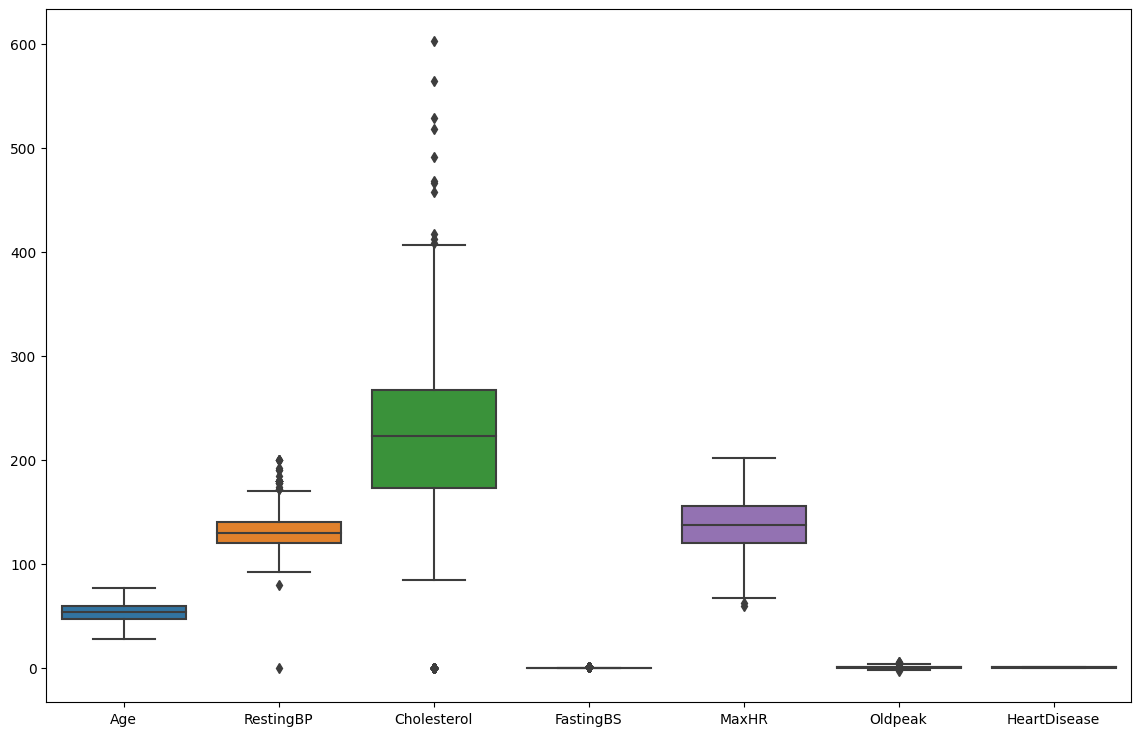

In [8]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df)

The codes below shows the maximum and minimum outliers as well as the outliers for each attribute. Our data set is used to forecast heart disease, and this forecast depends on changes in MaxHR and Oldpeak. Thus, we are unable to remove these rows. We must transform these values because Cholesterol and RestingBP cannot both be 0, even in the case of a dead person who still has hydrostatic blood pressure. 

In [9]:
df_num_name = ['age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

also in cholesterol histogram we can see there are some zero values that we want to deal with them.

In [20]:
#here we are detecting outliers :

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [12]:
#here we are trying to find the numbers of outliers and max and min of them to can detect them clearly:
outliers = find_outliers_IQR(df['RestingBP'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 28
max outlier value: 200
min outlier value: 0


In [13]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



We began by dealing with cholesterol. We determined the number of cholesterol values equal to 0 and found that there are 172 of them. 

In [14]:
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


In [15]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

To eliminate the zeros, we first set their initial value to np.nan and then set their values to the median of the values of the other rows.

In [16]:
ziro_RestingBP = df[df['RestingBP'] == 0]
print(f"zero value of RestingBP : {ziro_RestingBP.shape} ")

zero value of RestingBP : (1, 12) 


We found the pressure at 0 and dropped it.

In [17]:
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


In [18]:
df = df.drop(df[(df['RestingBP'] == 0)].index) 


Outliers after preprocessing :

In [21]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 27
max outlier value: 200
min outlier value: 80

-Check Cholesterol outliers 
number of outliers: 41
max outlier value: 603.0
min outlier value: 85.0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6

